<a href="https://colab.research.google.com/github/Salanakya/CV-projekt/blob/main/computer_vision_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Computer Vision klasyfikacja płci na podstawie datasetu CelebA**

#Kaggle

In [ ]:
!pip install kaggle #Install the Kaggle library

In [ ]:
! mkdir ~/.kaggle #Make a directory named “.kaggle”

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/ #Copy the “kaggle.json” into this new directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #Allocate the required permission for this file.

In [ ]:
! kaggle datasets list #You can check if everything's okay by running this command - ALL DATASETS AVAILABLE

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           7016        933  0.9375           
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           4546        113  1.0              
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1324        760  0.875            


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset #Downloading Datasets

 99% 1.31G/1.33G [00:07<00:00, 136MB/s]
100% 1.33G/1.33G [00:07<00:00, 185MB/s]


In [ ]:

!unzip celeba-dataset.zip #Unzip the data

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_a

#Import bibliotek & sprawdzenie datasetu

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import shutil
from sklearn.metrics import f1_score
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
attr_data = pd.read_csv('list_attr_celeba.csv')
attr_data.replace(to_replace=-1, value=0, inplace=True)
attr_data.head()

#1 - Male 0 - Female

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# List of available attributes

for col in data.columns:
    print(col)

image_id
5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young


#Podzial na zestawy:


*   treningowy 1 - 162 770
*   walidacyjny 162 771 - 182 637
*   testowy 182 638 - 202 599





In [ ]:
trainingset = attr_data
trainingset=trainingset.iloc[0:162770]

In [ ]:
validatingset = attr_data
validatingset=validatingset.iloc[162770:182637]

In [ ]:
testingset = attr_data
testingset=testingset.iloc[182637:202599]

#Badanie zbilansowania zbiorów

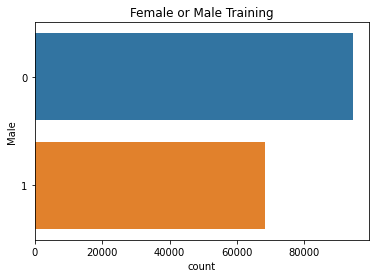

0    94509
1    68261
Name: Male, dtype: int64

In [ ]:
# Female or Male training
plt.title('Female or Male Training')
sns.countplot(y='Male', data=trainingset)
plt.show()

trainingset['Male'].value_counts()

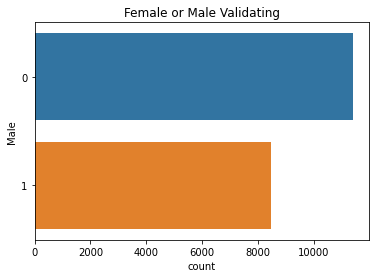

0    11409
1     8458
Name: Male, dtype: int64

In [ ]:
# Female or Male validating
plt.title('Female or Male Validating')
sns.countplot(y='Male', data=validatingset)
plt.show()

validatingset['Male'].value_counts()

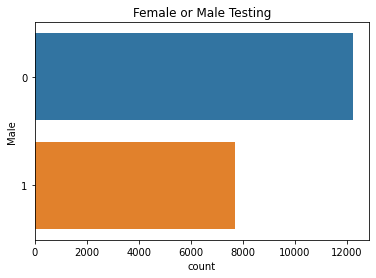

0    12247
1     7715
Name: Male, dtype: int64

In [ ]:
# Female or Male testing
plt.title('Female or Male Testing')
sns.countplot(y='Male', data=testingset)
plt.show()

testingset['Male'].value_counts()

#Dzielenie zbiorów na podfoldery wg płci

In [ ]:
#tworzenie folderow i podfolderow

! mkdir /content/training
! mkdir /content/validating
! mkdir /content/testingset


! mkdir /content/training/Male
! mkdir /content/training/Female
! mkdir /content/validating/Male
! mkdir /content/validating/Female
! mkdir /content/testingset/Male
! mkdir /content/testingset/Female

In [ ]:
#przenoszenie plikow do podfolderow wg zbioru i plci

gender = attr_data['Male']
gender

#1 - mężczyzna 0 - kobieta




0         0
1         0
2         1
3         0
4         0
         ..
202594    0
202595    1
202596    1
202597    0
202598    0
Name: Male, Length: 202599, dtype: int64

In [ ]:
img_list = []
for i in range(0,attr_data['image_id'].shape[0]):
    path = f"{'/content/img_align_celeba/img_align_celeba'}//{attr_data['image_id'][i]}"
    img_list.append(path)
img_list

['/content/img_align_celeba/img_align_celeba//000001.jpg',
 '/content/img_align_celeba/img_align_celeba//000002.jpg',
 '/content/img_align_celeba/img_align_celeba//000003.jpg',
 '/content/img_align_celeba/img_align_celeba//000004.jpg',
 '/content/img_align_celeba/img_align_celeba//000005.jpg',
 '/content/img_align_celeba/img_align_celeba//000006.jpg',
 '/content/img_align_celeba/img_align_celeba//000007.jpg',
 '/content/img_align_celeba/img_align_celeba//000008.jpg',
 '/content/img_align_celeba/img_align_celeba//000009.jpg',
 '/content/img_align_celeba/img_align_celeba//000010.jpg',
 '/content/img_align_celeba/img_align_celeba//000011.jpg',
 '/content/img_align_celeba/img_align_celeba//000012.jpg',
 '/content/img_align_celeba/img_align_celeba//000013.jpg',
 '/content/img_align_celeba/img_align_celeba//000014.jpg',
 '/content/img_align_celeba/img_align_celeba//000015.jpg',
 '/content/img_align_celeba/img_align_celeba//000016.jpg',
 '/content/img_align_celeba/img_align_celeba//000017.jpg

In [ ]:
#przenoszenie plikow do podfolderow wg zbioru i plci

for i in range(0,162771):
    if gender[i]==1:
        shutil.copy(img_list[i],'/content/training/Male')
    else:
        shutil.copy(img_list[i],'/content/training/Female')
for i in range(162771,182638):
    if gender[i]==1:
        shutil.copy(img_list[i],'/content/validating/Male')
    else:
        shutil.copy(img_list[i],'/content/validating/Female')
for i in range(182638,202599):
    if gender[i]==1:
        shutil.copy(img_list[i],'/content/testingset/Male')
    else:
        shutil.copy(img_list[i],'/content/testingset/Female')


#Sprawdzanie rozmiarów

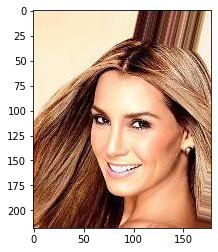

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/img_align_celeba/img_align_celeba/000001.jpg')
plt.imshow(img)

plt.show()

In [ ]:
print(img.shape)

(218, 178, 3)


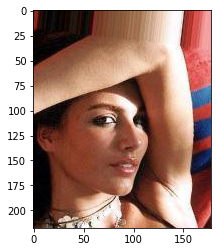

(218, 178, 3)


In [ ]:

img2 = mpimg.imread('/content/img_align_celeba/img_align_celeba/111666.jpg')
plt.imshow(img2)

plt.show()
print(img2.shape)

koncowe komenty od Bartka
plt.figure()

Add-subplots()



generowanie randomowych
np.random.choice([])

nie mozna wszystkich do x , trzeba je przeniesc do konkretnej lokalizacji -> https://zddatapol18.slack.com/archives/C03E6NR471B/p1652540649915439
train/male -> po atrybucie Male

#Trenowanie

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory='/content/testingset',#training
    target_size=(124, 100),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    color_mode='rgb')
valid_generator = valid_datagen.flow_from_directory(
    directory='/content/validating',#validating
    target_size=(124, 100),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    color_mode='rgb')

Found 19961 images belonging to 2 classes.
Found 19867 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(124,100,3),kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 25, 64)       0         
 2D)                                                    

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_size = 32
# steps_per_epoch = 162770/batch_size
# validation_steps = 19866/batch_size

In [ ]:
history = model.fit(
    train_generator,
    # steps_per_epoch=steps_per_epoch,
    epochs=2,
    # y=valid_generator,
    validation_data=valid_generator)

Epoch 1/2
624/624 [==============================] - 1415s 2s/step - loss: 0.3908 - accuracy: 0.8194 - val_loss: 0.2017 - val_accuracy: 0.9204
Epoch 2/2
624/624 [==============================] - 1409s 2s/step - loss: 0.1665 - accuracy: 0.9350 - val_loss: 0.1428 - val_accuracy: 0.9458
